# Project Name :- Sales Forecasting Across Multiple Retail Stores.

## Establishing the Logger :-

In [1]:
import pandas as pd
import logging

# Creating a logger. 

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

# Creating a Console Handler.

console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)

# Creating a File Handler.

file_handler = logging.FileHandler('Sales_data.log')
file_handler.setLevel(logging.DEBUG)

# Creating a Formatter and adding it to the Handlers.

formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

# Adding Handlers to Logger.

logger.addHandler(console_handler)
logger.addHandler(file_handler)

# Load the dataset.

def load_and_log_Sales_data():
    logger.info("Loading the Sales dataset")
    
    df = pd.read_csv("store.csv")
    
    logger.debug("Dataset loaded successfully.:")
    
    logger.info("Display first few rows of the dataset")
    print(df.head())
    
    logger.info("Generating basic statistics of the dataet:")
    print(df.describe())
    
    
    return df

if __name__ == "__main__":
    sales_df = load_and_log_Sales_data()

2025-06-25 03:56:40,960 - __main__ - INFO - Loading the Sales dataset
2025-06-25 03:56:40,974 - __main__ - DEBUG - Dataset loaded successfully.:
2025-06-25 03:56:40,975 - __main__ - INFO - Display first few rows of the dataset
2025-06-25 03:56:40,985 - __main__ - INFO - Generating basic statistics of the dataet:


   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [2]:
# Importing the important Libaries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Loding the datasets.

In [4]:
# Loading the dataset.
df1 = pd.read_csv("store.csv")
df2 = pd.read_csv("train.csv")
df3 = pd.read_csv("test.csv")

In [5]:
df1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
df3.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


# Preprocessing all 3 datasets.

In [8]:
# Checking for null values in dataset df1.
df1.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [9]:
# Filling the missing values using fillna functin.
df1["CompetitionDistance"].fillna(df1["CompetitionDistance"].median(),inplace=True)
df1['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df1['CompetitionOpenSinceYear'].fillna(0, inplace=True)
df1['CompetitionOpen'] = ((df1['CompetitionOpenSinceMonth'] > 0) &
                         (df1['CompetitionOpenSinceYear'] > 0)).astype(int)
df1.loc[df1['Promo2'] == 0, ['Promo2SinceWeek', 'Promo2SinceYear']] = 0
df1.loc[df1['Promo2'] == 0, 'PromoInterval'] = 'None'

In [10]:
df1.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
CompetitionOpen              0
dtype: int64

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
 10  CompetitionOpen            1115 non-null   int32  
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 91.6+ KB


In [12]:
cols_to_int = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
               'Promo2SinceWeek', 'Promo2SinceYear']
df1[cols_to_int] = df1[cols_to_int].astype(int)
cat_cols = ['StoreType', 'Assortment', 'PromoInterval']
df1[cat_cols] = df1[cat_cols].astype('category')


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Store                      1115 non-null   int64   
 1   StoreType                  1115 non-null   category
 2   Assortment                 1115 non-null   category
 3   CompetitionDistance        1115 non-null   float64 
 4   CompetitionOpenSinceMonth  1115 non-null   int32   
 5   CompetitionOpenSinceYear   1115 non-null   int32   
 6   Promo2                     1115 non-null   int64   
 7   Promo2SinceWeek            1115 non-null   int32   
 8   Promo2SinceYear            1115 non-null   int32   
 9   PromoInterval              1115 non-null   category
 10  CompetitionOpen            1115 non-null   int32   
dtypes: category(3), float64(1), int32(5), int64(2)
memory usage: 51.8 KB


In [14]:
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [15]:
df2.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [17]:
cols_to_int = ["Store","DayOfWeek","Sales","Customers","Open","Promo","SchoolHoliday"]
df2[cols_to_int] = df2[cols_to_int].astype(int)
cat_cols = ['StateHoliday']
df2[cat_cols] = df2[cat_cols].astype('category')

In [18]:
df2['StateHoliday'] = df2['StateHoliday'].astype(str).replace({'0': 'None', 'a': 'PublicHoliday', 'b': 'EasterHoliday', 'c': 'Christmas'})
df2['Open'] = df2['Open'].fillna(1).astype(int)
df2['Promo'] = df2['Promo'].astype(int)
df2 = df2[df2['Open'] == 1]

In [19]:
df2["Date"]=pd.to_datetime(df2["Date"])

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store          844392 non-null  int32         
 1   DayOfWeek      844392 non-null  int32         
 2   Date           844392 non-null  datetime64[ns]
 3   Sales          844392 non-null  int32         
 4   Customers      844392 non-null  int32         
 5   Open           844392 non-null  int32         
 6   Promo          844392 non-null  int32         
 7   StateHoliday   844392 non-null  object        
 8   SchoolHoliday  844392 non-null  int32         
dtypes: datetime64[ns](1), int32(7), object(1)
memory usage: 41.9+ MB


In [21]:
df3

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [22]:
# Clean 'StateHoliday' values
df3['StateHoliday'] = df3['StateHoliday'].astype(str).replace({
    '0': 'None', 'a': 'PublicHoliday', 'b': 'EasterHoliday', 'c': 'Christmas'
})

# Fill missing values and convert types
df3['Open'] = df3['Open'].fillna(1).astype(int)
df3['Promo'] = df3['Promo'].astype(int)

# Create date-related features
#df3['Year'] = df3['Date'].dt.year
#df3['Month'] = df3['Date'].dt.month
#df3['Day'] = df3['Date'].dt.day
#df3['DayOfYear'] = df3['Date'].dt.dayofyear
#df3['WeekOfYear'] = df3['Date'].dt.isocalendar().week.astype(int)
#df3['Quarter'] = df3['Date'].dt.quarter
#df3['Weekday'] = df3['Date'].dt.weekday
#df3['IsWeekend'] = df3['Weekday'].isin([5, 6]).astype(int)

# One-hot encode 'StateHoliday'
df3 = pd.get_dummies(df3, columns=["StateHoliday"], drop_first=True)

# Sort by Store and Date
df3 = df3.sort_values(['Store', 'Date']).reset_index(drop=True)

# Drop Id column if present (optional)
df3 = df3.drop(columns=["Id"], errors="ignore")

# Final check
print(df3.head())
print(df3.shape)

   Store  DayOfWeek        Date  Open  Promo  SchoolHoliday  \
0      1          6  2015-08-01     1      0              1   
1      1          7  2015-08-02     0      0              1   
2      1          1  2015-08-03     1      1              1   
3      1          2  2015-08-04     1      1              1   
4      1          3  2015-08-05     1      1              1   

   StateHoliday_PublicHoliday  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
(41088, 7)


In [23]:
df3.isnull().sum()

Store                         0
DayOfWeek                     0
Date                          0
Open                          0
Promo                         0
SchoolHoliday                 0
StateHoliday_PublicHoliday    0
dtype: int64

In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Store                       41088 non-null  int64 
 1   DayOfWeek                   41088 non-null  int64 
 2   Date                        41088 non-null  object
 3   Open                        41088 non-null  int32 
 4   Promo                       41088 non-null  int32 
 5   SchoolHoliday               41088 non-null  int64 
 6   StateHoliday_PublicHoliday  41088 non-null  uint8 
dtypes: int32(2), int64(3), object(1), uint8(1)
memory usage: 1.6+ MB


# Merging store datatset with train dataset.

In [25]:
df4 = pd.merge(df1,df3, on="Store",how="left")

In [26]:
df4

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_PublicHoliday
0,1,c,a,1270.0,9,2008,0,0,0,None,1,6.0,2015-08-01,1.0,0.0,1.0,0.0
1,1,c,a,1270.0,9,2008,0,0,0,None,1,7.0,2015-08-02,0.0,0.0,1.0,0.0
2,1,c,a,1270.0,9,2008,0,0,0,None,1,1.0,2015-08-03,1.0,1.0,1.0,0.0
3,1,c,a,1270.0,9,2008,0,0,0,None,1,2.0,2015-08-04,1.0,1.0,1.0,0.0
4,1,c,a,1270.0,9,2008,0,0,0,None,1,3.0,2015-08-05,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,7.0,2015-09-13,0.0,0.0,0.0,0.0
41343,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,1.0,2015-09-14,1.0,1.0,0.0,0.0
41344,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,2.0,2015-09-15,1.0,1.0,0.0,0.0
41345,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,3.0,2015-09-16,1.0,1.0,0.0,0.0


# Merging store dataset with test dataset.

In [27]:
df5 = pd.merge(df1,df2, on="Store",how="left")

In [28]:
df5

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9,2008,0,0,0,None,1,5,2015-07-31,5263,555,1,1,None,1
1,1,c,a,1270.0,9,2008,0,0,0,None,1,4,2015-07-30,5020,546,1,1,None,1
2,1,c,a,1270.0,9,2008,0,0,0,None,1,3,2015-07-29,4782,523,1,1,None,1
3,1,c,a,1270.0,9,2008,0,0,0,None,1,2,2015-07-28,5011,560,1,1,None,1
4,1,c,a,1270.0,9,2008,0,0,0,None,1,1,2015-07-27,6102,612,1,1,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,1,2013-01-07,6905,471,1,1,None,1
844388,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,6,2013-01-05,4771,339,1,0,None,1
844389,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,5,2013-01-04,4540,326,1,0,None,1
844390,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,4,2013-01-03,4297,300,1,0,None,1


# Preprocessing Dataset df4

In [29]:
df4

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_PublicHoliday
0,1,c,a,1270.0,9,2008,0,0,0,None,1,6.0,2015-08-01,1.0,0.0,1.0,0.0
1,1,c,a,1270.0,9,2008,0,0,0,None,1,7.0,2015-08-02,0.0,0.0,1.0,0.0
2,1,c,a,1270.0,9,2008,0,0,0,None,1,1.0,2015-08-03,1.0,1.0,1.0,0.0
3,1,c,a,1270.0,9,2008,0,0,0,None,1,2.0,2015-08-04,1.0,1.0,1.0,0.0
4,1,c,a,1270.0,9,2008,0,0,0,None,1,3.0,2015-08-05,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41342,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,7.0,2015-09-13,0.0,0.0,0.0,0.0
41343,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,1.0,2015-09-14,1.0,1.0,0.0,0.0
41344,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,2.0,2015-09-15,1.0,1.0,0.0,0.0
41345,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,3.0,2015-09-16,1.0,1.0,0.0,0.0


In [30]:
# Checking for null values.
df5.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
CompetitionOpen              0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41347 entries, 0 to 41346
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Store                       41347 non-null  int64   
 1   StoreType                   41347 non-null  category
 2   Assortment                  41347 non-null  category
 3   CompetitionDistance         41347 non-null  float64 
 4   CompetitionOpenSinceMonth   41347 non-null  int32   
 5   CompetitionOpenSinceYear    41347 non-null  int32   
 6   Promo2                      41347 non-null  int64   
 7   Promo2SinceWeek             41347 non-null  int32   
 8   Promo2SinceYear             41347 non-null  int32   
 9   PromoInterval               41347 non-null  category
 10  CompetitionOpen             41347 non-null  int32   
 11  DayOfWeek                   41088 non-null  float64 
 12  Date                        41088 non-null  object  
 13  Open            

In [32]:
df4.duplicated().sum()

0

## Checkig outliers for numerical columns in df4.

In [33]:
num_cols=df4.select_dtypes(include=["int","float"]).columns

In [34]:
num_cols

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionOpen', 'DayOfWeek', 'Open', 'Promo',
       'SchoolHoliday', 'StateHoliday_PublicHoliday'],
      dtype='object')

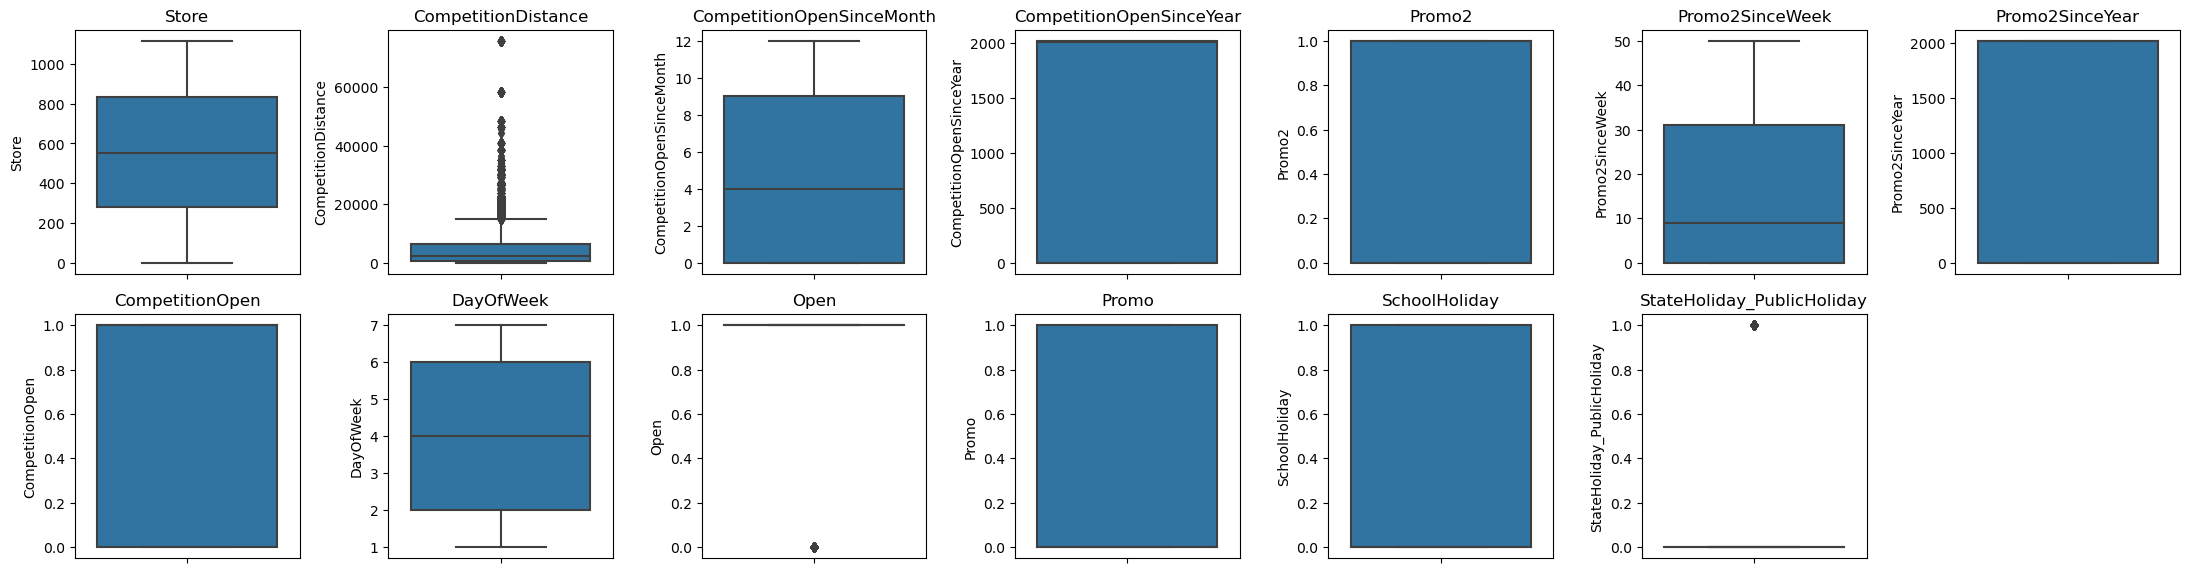

In [35]:
plt.figure(figsize=(22,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(7,7,i)
    sns.boxplot(y=df4[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Handeling the outliers

In [36]:
for i in num_cols:
    Q1=df4[i].quantile(0.25)
    print("The value of first quantile for column",i,"is",Q1)
    Q2=df4[i].quantile(0.50)
    print("The value of first quantile for column",i,"is",Q2)
    Q3=df4[i].quantile(0.75)
    print("The value of first quantile for column",i,"is",Q3)
    
    IQR=Q3-Q1
    print("The value of Inter Quartile Range is",IQR)
    
    LL=df4[i].quantile(0.25)-1.5*(df4[i].quantile(0.75)-df4[i].quantile(0.25))
    print("The Lower Limit for column",i,"is",LL)
    UL=df4[i].quantile(0.75)+1.5*(df4[i].quantile(0.75)-df4[i].quantile(0.25))
    print("The Upper Limit for column",i,"is",UL)
    
    n=df4[(df4[i]<LL)|(df4[i]>UL)].count()[0]
    print("The Number of outliers for column",i,"is",n)
    
    df4[i]=np.where((df4[i]<LL)|(df4[i]>UL),df4[i].median(),df4[i])
    n=df4[(df4[i]<LL)|(df4[i]>UL)].count()[0]
    print("The Number of Outliers after Imputation is",n)     
    print("  ")
    print("  ")

The value of first quantile for column Store is 279.5
The value of first quantile for column Store is 554.0
The value of first quantile for column Store is 833.0
The value of Inter Quartile Range is 553.5
The Lower Limit for column Store is -550.75
The Upper Limit for column Store is 1663.25
The Number of outliers for column Store is 0
The Number of Outliers after Imputation is 0
  
  
The value of first quantile for column CompetitionDistance is 720.0
The value of first quantile for column CompetitionDistance is 2410.0
The value of first quantile for column CompetitionDistance is 6480.0
The value of Inter Quartile Range is 5760.0
The Lower Limit for column CompetitionDistance is -7920.0
The Upper Limit for column CompetitionDistance is 15120.0
The Number of outliers for column CompetitionDistance is 3739
The Number of Outliers after Imputation is 0
  
  
The value of first quantile for column CompetitionOpenSinceMonth is 0.0
The value of first quantile for column CompetitionOpenSinceM

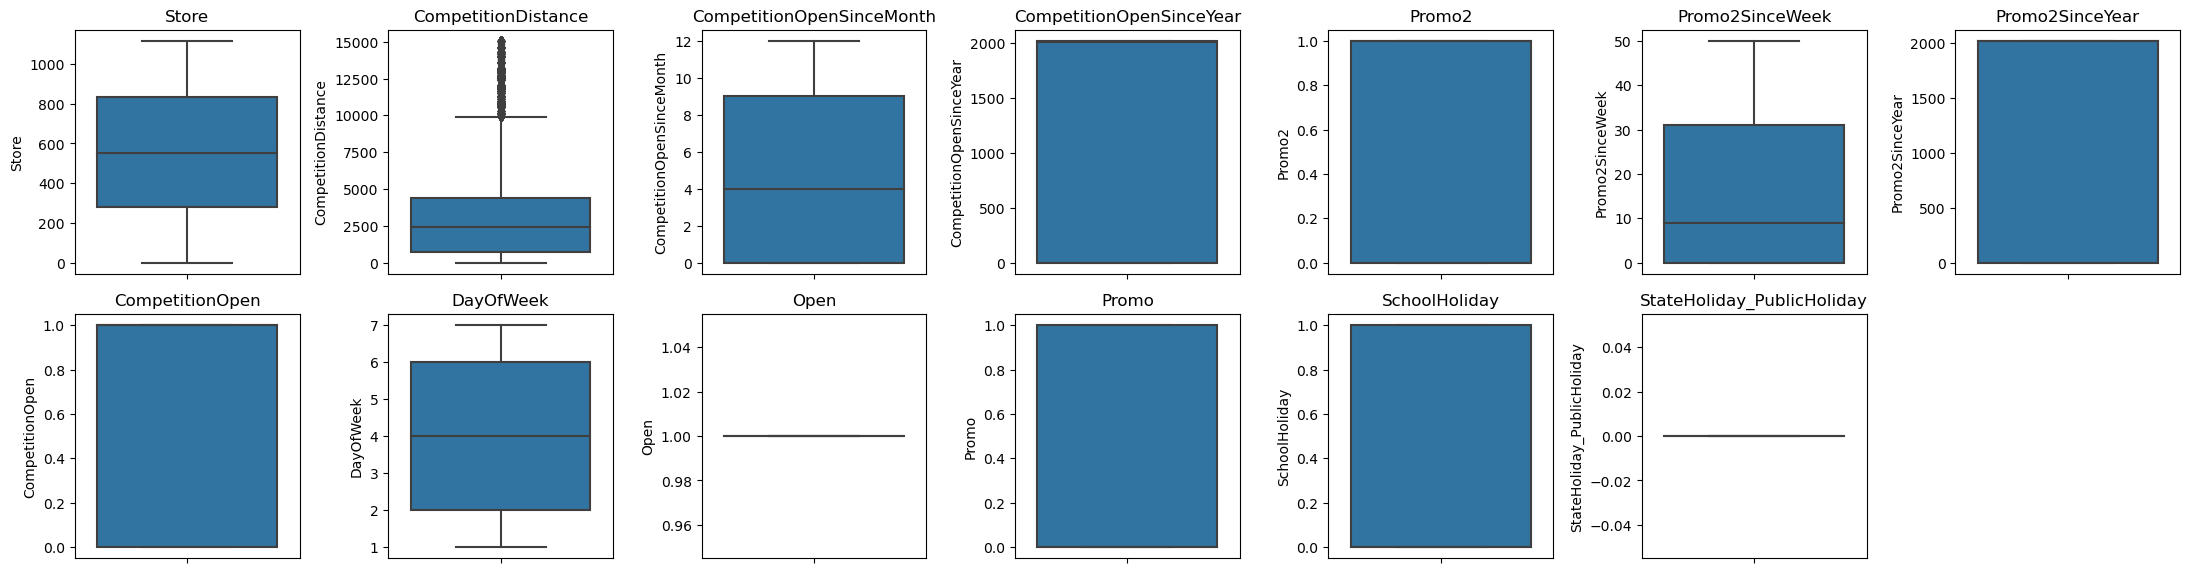

In [37]:
plt.figure(figsize=(22,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(7,7,i)
    sns.boxplot(y=df4[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [38]:
#Handeling outlier for "Competition Distance" column.

df4["CompetitionDistance"]=np.where(df4["CompetitionDistance"]>4747.5,df4["CompetitionDistance"].median(),df4["CompetitionDistance"])

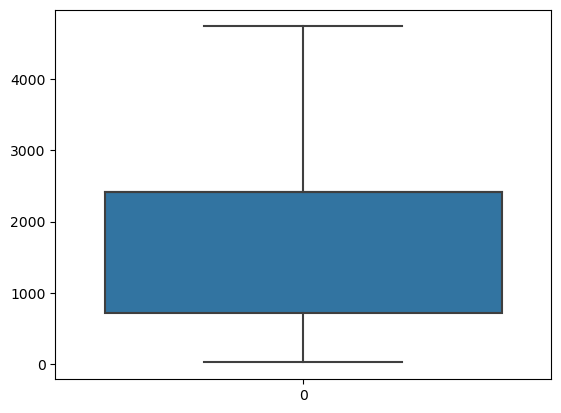

In [39]:
sns.boxplot(df4["CompetitionDistance"])
plt.show()

## Boxplot after handeling outliers in df4

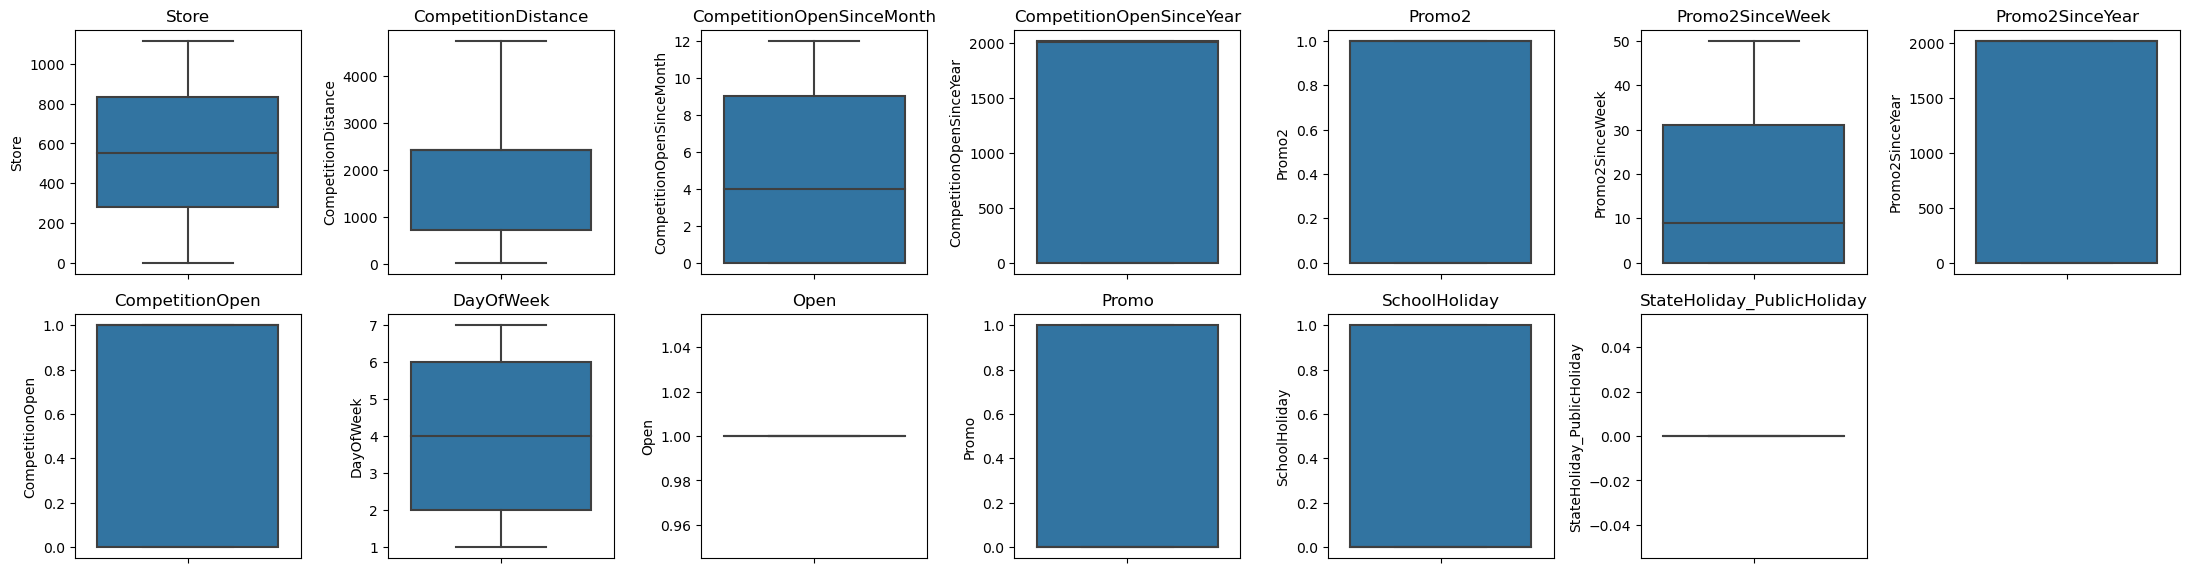

In [40]:
plt.figure(figsize=(22,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(7,7,i)
    sns.boxplot(y=df4[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Preprocessing Dataset df5

In [41]:
df5

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9,2008,0,0,0,None,1,5,2015-07-31,5263,555,1,1,None,1
1,1,c,a,1270.0,9,2008,0,0,0,None,1,4,2015-07-30,5020,546,1,1,None,1
2,1,c,a,1270.0,9,2008,0,0,0,None,1,3,2015-07-29,4782,523,1,1,None,1
3,1,c,a,1270.0,9,2008,0,0,0,None,1,2,2015-07-28,5011,560,1,1,None,1
4,1,c,a,1270.0,9,2008,0,0,0,None,1,1,2015-07-27,6102,612,1,1,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,1,2013-01-07,6905,471,1,1,None,1
844388,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,6,2013-01-05,4771,339,1,0,None,1
844389,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,5,2013-01-04,4540,326,1,0,None,1
844390,1115,d,c,5350.0,0,0,1,22,2012,"Mar,Jun,Sept,Dec",0,4,2013-01-03,4297,300,1,0,None,1


In [42]:
df5.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
CompetitionOpen              0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

In [43]:
columns_to_drop = [
    'Date',
    'Customers',
    'CompetitionOpenSinceMonth',
    'CompetitionOpenSinceYear',
    'Promo2SinceWeek',
    'Promo2SinceYear',
    'CompetitionOpen'
]
df5.drop(columns=columns_to_drop, errors='ignore', inplace=True)
print(df5.columns)

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'Promo2',
       'PromoInterval', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


In [44]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Store                844392 non-null  int64   
 1   StoreType            844392 non-null  category
 2   Assortment           844392 non-null  category
 3   CompetitionDistance  844392 non-null  float64 
 4   Promo2               844392 non-null  int64   
 5   PromoInterval        844392 non-null  category
 6   DayOfWeek            844392 non-null  int32   
 7   Sales                844392 non-null  int32   
 8   Open                 844392 non-null  int32   
 9   Promo                844392 non-null  int32   
 10  StateHoliday         844392 non-null  object  
 11  SchoolHoliday        844392 non-null  int32   
dtypes: category(3), float64(1), int32(5), int64(2), object(1)
memory usage: 50.7+ MB


In [45]:
# Make a clean copy if needed
df5 = df5.copy()

# Confirm category dtypes
cat_cols = ['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval']

# One-hot encode (drop_first=True avoids dummy variable trap)
df5 = pd.get_dummies(df5, columns=cat_cols, drop_first=True)

# Optional: optimize dtypes for memory (int64 -> int32, etc.)
for col in df5.select_dtypes(include='int64').columns:
    df5[col] = pd.to_numeric(df5[col], downcast='integer')

for col in df5.select_dtypes(include='float64').columns:
    df5[col] = pd.to_numeric(df5[col], downcast='float')

# Final check
print(df5.dtypes)
print(df5.shape)

Store                               int16
CompetitionDistance               float32
Promo2                               int8
DayOfWeek                           int32
Sales                               int32
Open                                int32
Promo                               int32
SchoolHoliday                       int32
StateHoliday_EasterHoliday          uint8
StateHoliday_None                   uint8
StateHoliday_PublicHoliday          uint8
StoreType_b                         uint8
StoreType_c                         uint8
StoreType_d                         uint8
Assortment_b                        uint8
Assortment_c                        uint8
PromoInterval_Jan,Apr,Jul,Oct       uint8
PromoInterval_Mar,Jun,Sept,Dec      uint8
PromoInterval_None                  uint8
dtype: object
(844392, 19)


In [46]:
df5.drop_duplicates()

,Store,CompetitionDistance,Promo2,DayOfWeek,Sales,Open,Promo,SchoolHoliday,StateHoliday_EasterHoliday,StateHoliday_None,StateHoliday_PublicHoliday,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",PromoInterval_None
0,1,1270.0,0,5,5263,1,1,1,0,1,0,0,1,0,0,0,0,0,1
1,1,1270.0,0,4,5020,1,1,1,0,1,0,0,1,0,0,0,0,0,1
2,1,1270.0,0,3,4782,1,1,1,0,1,0,0,1,0,0,0,0,0,1
3,1,1270.0,0,2,5011,1,1,1,0,1,0,0,1,0,0,0,0,0,1
4,1,1270.0,0,1,6102,1,1,1,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,1115,5350.0,1,1,6905,1,1,1,0,1,0,0,0,1,0,1,0,1,0
844388,1115,5350.0,1,6,4771,1,0,1,0,1,0,0,0,1,0,1,0,1,0
844389,1115,5350.0,1,5,4540,1,0,1,0,1,0,0,0,1,0,1,0,1,0
844390,1115,5350.0,1,4,4297,1,0,1,0,1,0,0,0,1,0,1,0,1,0


## Checking outliers for numerical columns.

In [47]:
num_cols=df5.select_dtypes(include=["int","float"]).columns

In [48]:
num_cols

Index(['CompetitionDistance', 'DayOfWeek', 'Sales', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

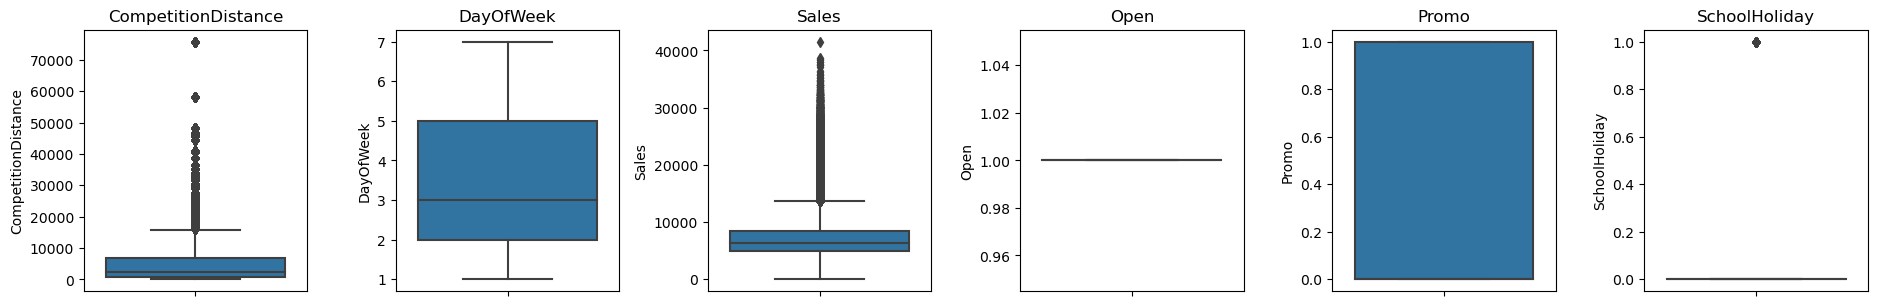

In [49]:
plt.figure(figsize=(22,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(7,7,i)
    sns.boxplot(y=df5[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Handeling the outliers.

In [50]:
for i in num_cols:
    Q1=df5[i].quantile(0.25)
    print("The value of first quantile for column",i,"is",Q1)
    Q2=df5[i].quantile(0.50)
    print("The value of first quantile for column",i,"is",Q2)
    Q3=df5[i].quantile(0.75)
    print("The value of first quantile for column",i,"is",Q3)
    
    IQR=Q3-Q1
    print("The value of Inter Quartile Range is",IQR)
    
    LL=df5[i].quantile(0.25)-1.5*(df5[i].quantile(0.75)-df5[i].quantile(0.25))
    print("The Lower Limit for column",i,"is",LL)
    UL=df5[i].quantile(0.75)+1.5*(df5[i].quantile(0.75)-df5[i].quantile(0.25))
    print("The Upper Limit for column",i,"is",UL)
    
    n=df5[(df5[i]<LL)|(df5[i]>UL)].count()[0]
    print("The Number of outliers for column",i,"is",n)
    
    df5[i]=np.where((df5[i]<LL)|(df5[i]>UL),df5[i].median(),df5[i])
    n=df5[(df5[i]<LL)|(df5[i]>UL)].count()[0]
    print("The Number of Outliers after Imputation is",n)     
    print("  ")
    print("  ")

The value of first quantile for column CompetitionDistance is 710.0
The value of first quantile for column CompetitionDistance is 2325.0
The value of first quantile for column CompetitionDistance is 6880.0
The value of Inter Quartile Range is 6170.0
The Lower Limit for column CompetitionDistance is -8545.0
The Upper Limit for column CompetitionDistance is 16135.0
The Number of outliers for column CompetitionDistance is 83041
The Number of Outliers after Imputation is 0
  
  
The value of first quantile for column DayOfWeek is 2.0
The value of first quantile for column DayOfWeek is 3.0
The value of first quantile for column DayOfWeek is 5.0
The value of Inter Quartile Range is 3.0
The Lower Limit for column DayOfWeek is -2.5
The Upper Limit for column DayOfWeek is 9.5
The Number of outliers for column DayOfWeek is 0
The Number of Outliers after Imputation is 0
  
  
The value of first quantile for column Sales is 4859.0
The value of first quantile for column Sales is 6369.0
The value of

In [51]:
df5["CompetitionDistance"]=np.where(df5["CompetitionDistance"]>4747.5,df5["CompetitionDistance"].median(),df5["CompetitionDistance"])

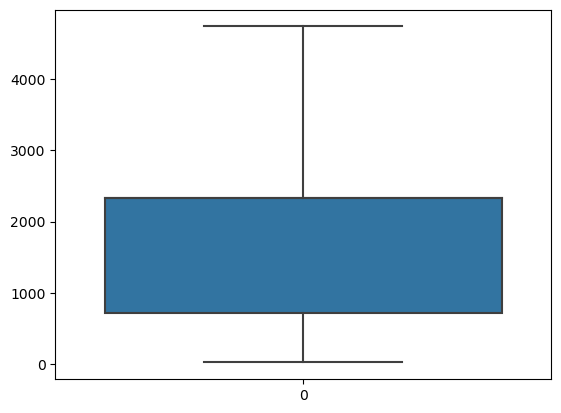

In [52]:
sns.boxplot(df5["CompetitionDistance"])
plt.show()

In [53]:
df5["Sales"]=np.where(df5["Sales"]>12166.5,df5["Sales"].median(),df5["Sales"])

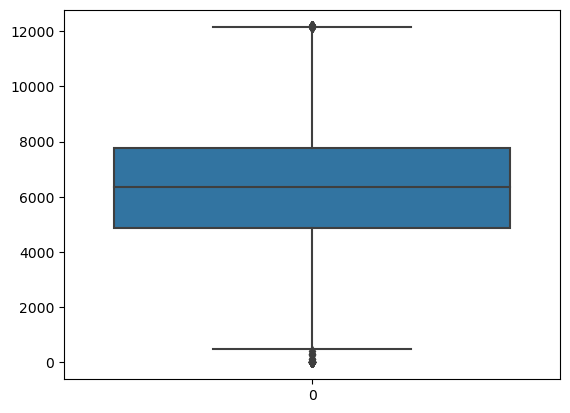

In [54]:
sns.boxplot(df5["Sales"])
plt.show()

## Boxplot after Handeling outliers for df5

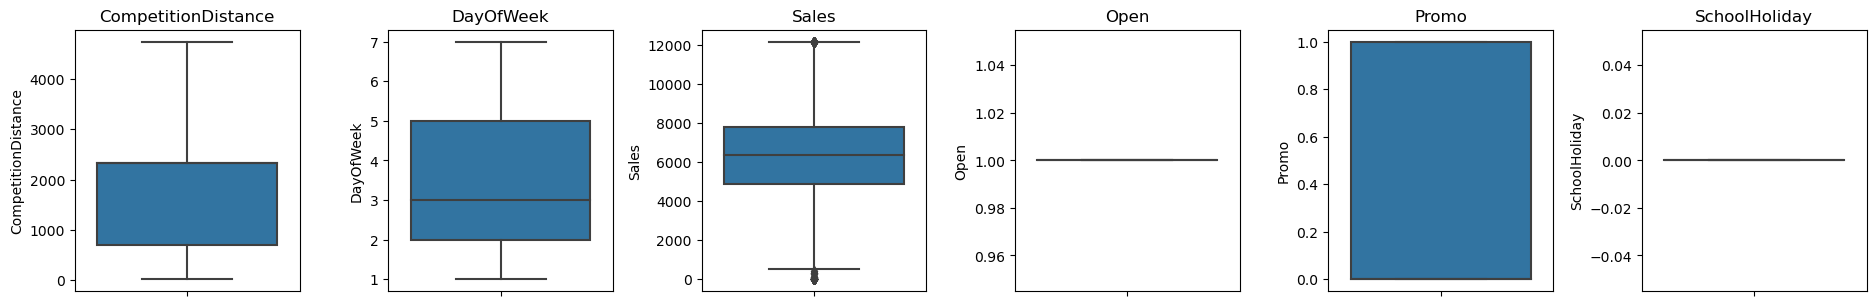

In [55]:
plt.figure(figsize=(22,20))
for i,col in enumerate(num_cols,1):
    plt.subplot(7,7,i)
    sns.boxplot(y=df5[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Visualization

# Store Open/Closed Distribution

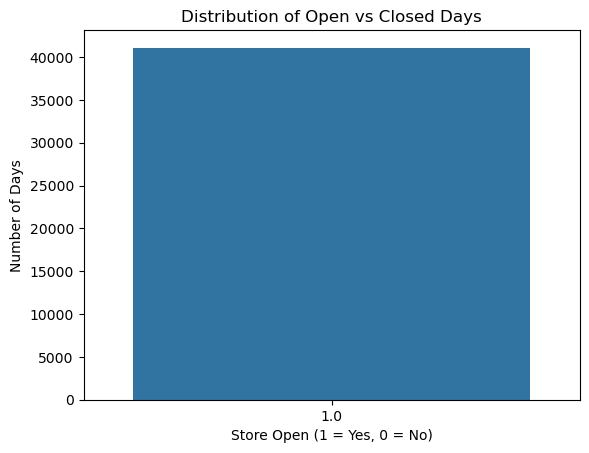

In [56]:
sns.countplot(x='Open', data=df4)
plt.title("Distribution of Open vs Closed Days")
plt.xlabel("Store Open (1 = Yes, 0 = No)")
plt.ylabel("Number of Days")
plt.show()

**The above plot shows the distribution of open versus closed days for stores. Most of the days, stores are open (Open = 1), while closed days (Open = 0) are relatively few. This suggests that store closures are infrequent and likely tied to specific events like holidays or maintenance.**

## Promo Distribution

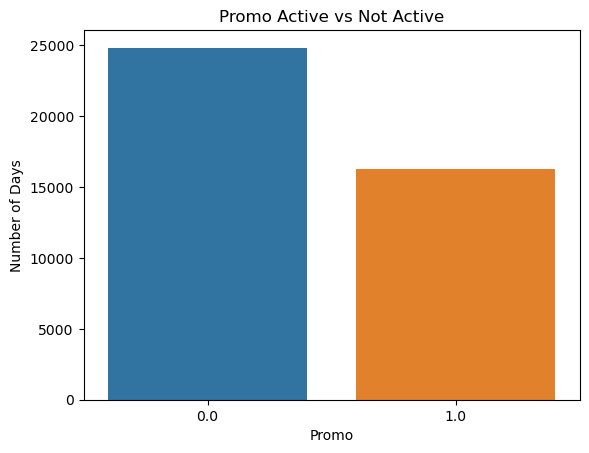

In [57]:
sns.countplot(x='Promo', data=df4)
plt.title("Promo Active vs Not Active")
plt.xlabel("Promo")
plt.ylabel("Number of Days")
plt.show()

**The above plot shows the distribution of days when promotions were active versus not active in the dataset. If the bars are uneven, it indicates more days without promotions or vice versa. This helps understand how often promotions are run, which can impact sales patterns and customer behavior.**

## School Holiday Patterns by Day of Week

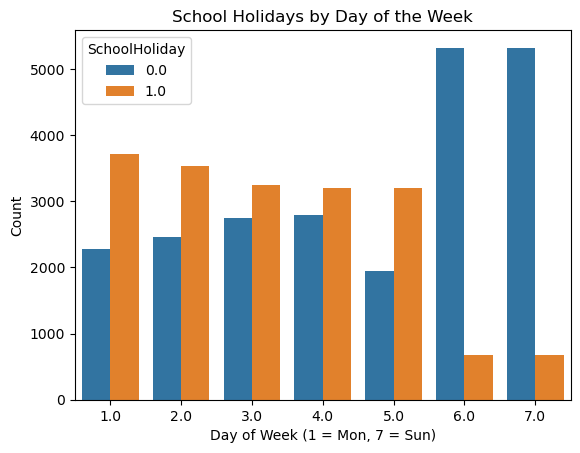

In [58]:
sns.countplot(x='DayOfWeek', hue='SchoolHoliday', data=df4)
plt.title("School Holidays by Day of the Week")
plt.xlabel("Day of Week (1 = Mon, 7 = Sun)")
plt.ylabel("Count")
plt.legend(title='SchoolHoliday')
plt.show()

**This plot reveals how school holidays are distributed across the days of the week. Typically, higher counts on certain weekdays with school holidays can indicate when stores might experience altered customer traffic due to holidays. It helps identify if weekends or specific weekdays have more school holidays, which can influence sales and staffing needs.**

# Promo2 Status

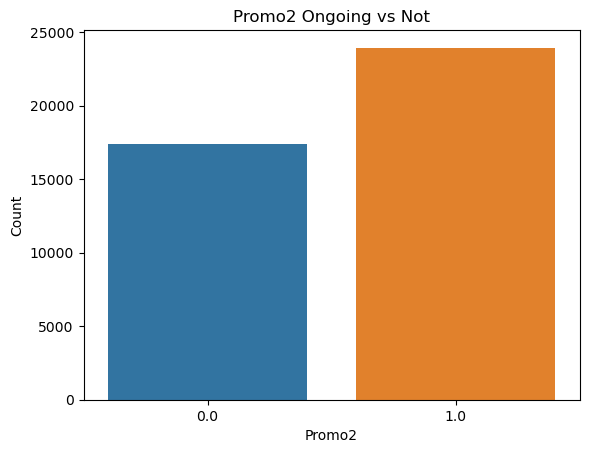

In [59]:
sns.countplot(x='Promo2', data=df4)
plt.title("Promo2 Ongoing vs Not")
plt.xlabel("Promo2")
plt.ylabel("Count")
plt.show()

**This count plot shows the frequency of days when Promo2 is ongoing versus not in the dataset. A higher count for 'Promo2 = 0' indicates most days have no active Promo2 campaigns, while a significant number of 'Promo2 = 1' days shows sustained promotional activity. Understanding Promo2 distribution helps evaluate its potential impact on sales over time.**

## Pie Chart for Open v/s Closed Store Status

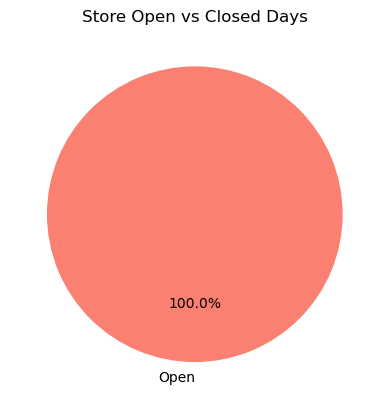

In [60]:
df4['Open'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Open', 'Closed'], colors=['salmon'])
plt.title('Store Open vs Closed Days')
plt.ylabel('')
plt.show()

**The pie chart shows the proportion of days stores were open versus closed. A large majority of days being "Open" (e.g., above 80-90%) suggests stores operate regularly, while the smaller "Closed" slice highlights occasional non-operational days. This balance is important for understanding store availability and potential sales opportunities.**

## Assortment Type Distribution

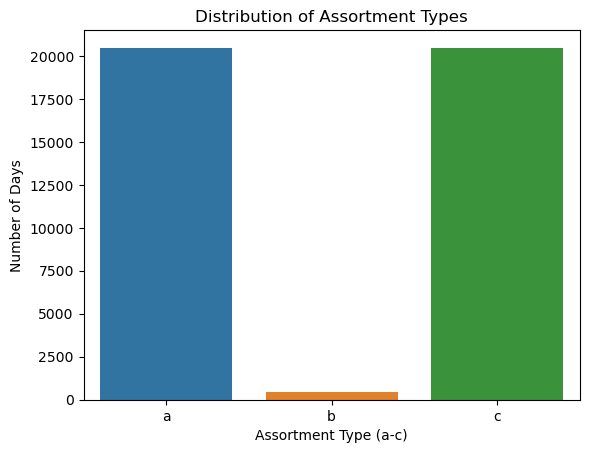

In [61]:
df5['Assortment'] = df5[['Assortment_b', 'Assortment_c']].idxmax(axis=1).str[-1].fillna('a')
sns.countplot(x='Assortment', data=df4)
plt.title("Distribution of Assortment Types")
plt.xlabel("Assortment Type (a-c)")
plt.ylabel("Number of Days")
plt.show()

**This plot displays the distribution of assortment types 'a' to 'c' across the dataset. The dominant assortment type(s) reflect the most common product variety offered by stores on given days, which can affect customer preferences and sales. Less frequent types might indicate specialized or limited product selections.**

# SchoolHoliday

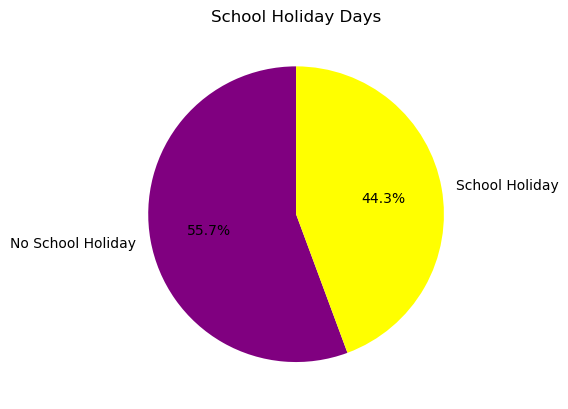

In [62]:
df4['SchoolHoliday'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No School Holiday', 'School Holiday'], colors=['purple', 'yellow'])
plt.title('School Holiday Days')
plt.ylabel('')
plt.show()

**The pie chart reveals the proportion of days with and without school holidays. A larger "No School Holiday" slice suggests most days are regular school days, while the smaller "School Holiday" portion indicates fewer holiday days. This helps understand how school holidays might affect customer footfall and sales patterns.**

## Distribution of Competition Distance

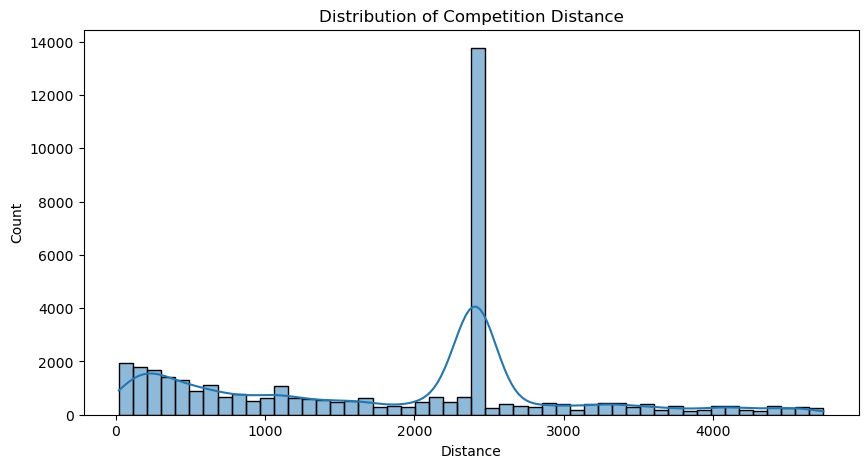

In [63]:
plt.figure(figsize=(10,5))
sns.histplot(df4['CompetitionDistance'], bins=50, kde=True)
plt.title('Distribution of Competition Distance')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

## Correlation of Numeric Features.

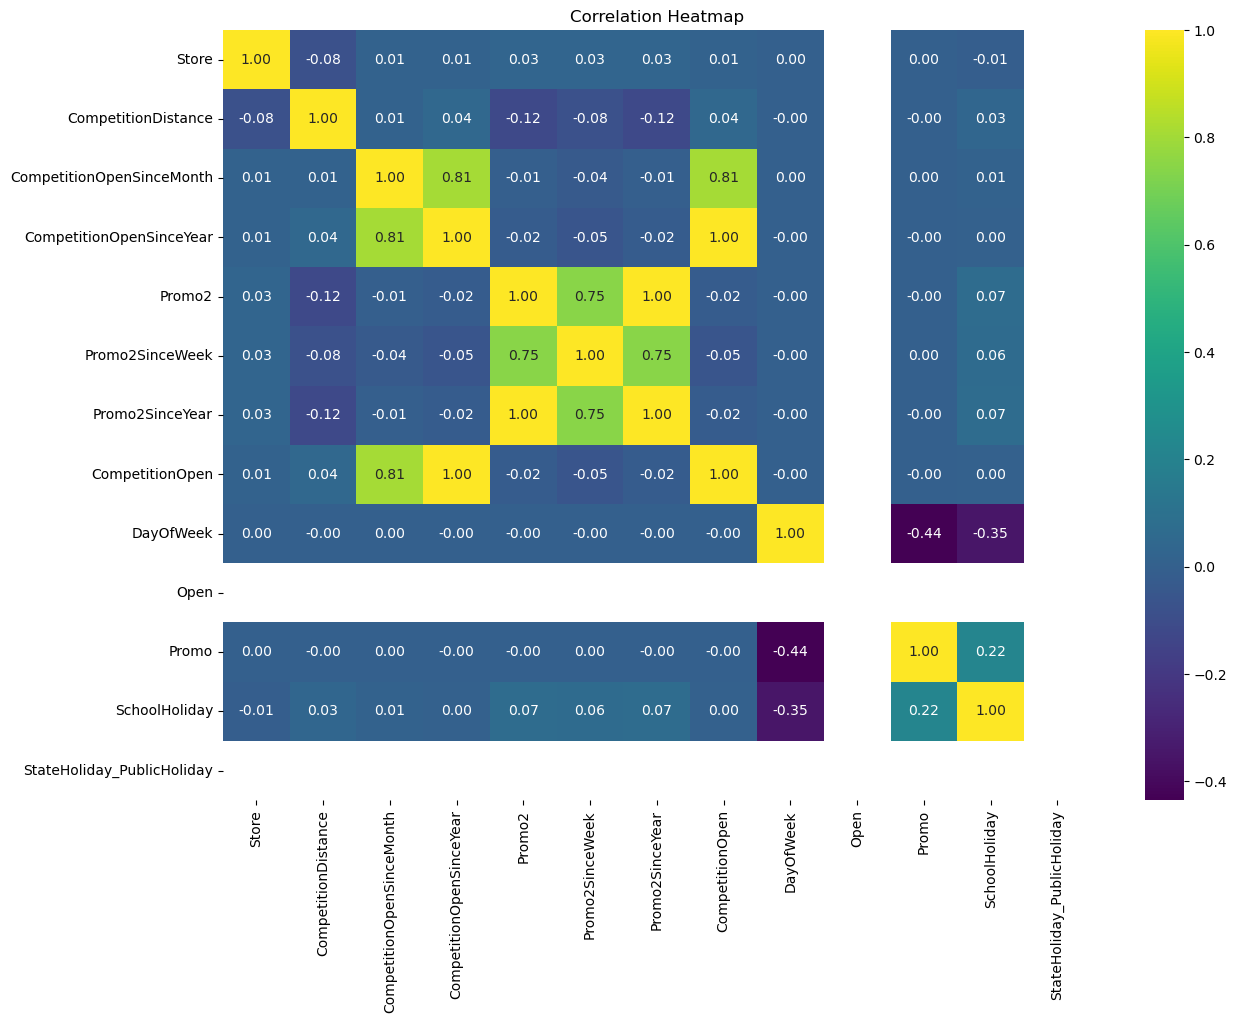

In [64]:

plt.figure(figsize=(14, 10))
sns.heatmap(df4.corr(numeric_only=True), annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

**This full correlation heatmap displays the strength and direction of relationships between all numeric features in the dataset. Bright colors indicate strong positive or negative correlations, helping to identify which variables move together and which may be redundant or impactful for modeling. It’s a great overview to spot key predictors and multicollinearity issues.**

In [65]:
df4.to_csv('df4.csv', index=False)

In [66]:
df5.to_csv('df5.csv', index=False)